This is a copy of my previous findSun notebook to help Jean verify the moon's location.

#David Lewis 2018

In [78]:
#import dependencies
from astropy.time import Time
from astropy import coordinates as coord
from astropy import units as u
from pyuvdata import UVData
import numpy as np
from numpy import ndarray
import itertools
import numpy.ma as ma
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi

np.set_printoptions(threshold='nan')

In [79]:
#intit arrays
file_arr=[]
time_arr=[]
JD_arr=[]

file_arr=glob('/data6/HERA/data/2458055/*.uvfits') #get a file list
file_arr.sort()

#print file_arr[0][29:42]
for i in range(len(file_arr)):
    time_arr.append(file_arr[i][29:42]) #split that sucker up and put into new list
timefloat=[float(i) for i in time_arr]


In [80]:
print(time_arr)
print(timefloat)

['2458055.12552', '2458055.12552', '2458055.13297', '2458055.13297', '2458055.14043', '2458055.14043', '2458055.14788', '2458055.14788', '2458055.15534', '2458055.15534', '2458055.16280', '2458055.16280', '2458055.17025', '2458055.17025', '2458055.17771', '2458055.17771', '2458055.18517', '2458055.18517', '2458055.19262', '2458055.19262', '2458055.19262', '2458055.20008', '2458055.20008', '2458055.20754', '2458055.20754', '2458055.20754', '2458055.21499', '2458055.21499', '2458055.22245', '2458055.22245', '2458055.22991', '2458055.22991', '2458055.23736', '2458055.23736', '2458055.24482', '2458055.24482', '2458055.25228', '2458055.25228', '2458055.25973', '2458055.25973', '2458055.26719', '2458055.26719', '2458055.27465', '2458055.27465', '2458055.28210', '2458055.28210', '2458055.28956', '2458055.28956', '2458055.29702', '2458055.29702', '2458055.30447', '2458055.30447', '2458055.31193', '2458055.31193', '2458055.31939', '2458055.31939', '2458055.32684', '2458055.32684', '2458055.3343

In [81]:
#convert JD dates to sidereal
for item in time_arr:
    JD_arr.append(float(item))

date_arr=Time(JD_arr,format='jd',scale='utc')
lst_arr=date_arr.sidereal_time('apparent','21d25m39.0s')
print(lst_arr)

[u'18h55m02.7398s' u'18h55m02.7398s' u'19h05m48.1821s' u'19h05m48.1821s'
 u'19h16m34.4908s' u'19h16m34.4908s' u'19h27m19.9331s' u'19h27m19.9331s'
 u'19h38m06.2418s' u'19h38m06.2418s' u'19h48m52.5505s' u'19h48m52.5505s'
 u'19h59m37.9928s' u'19h59m37.9928s' u'20h10m24.3015s' u'20h10m24.3015s'
 u'20h21m10.6102s' u'20h21m10.6102s' u'20h31m56.0525s' u'20h31m56.0525s'
 u'20h31m56.0525s' u'20h42m42.3612s' u'20h42m42.3612s' u'20h53m28.6699s'
 u'20h53m28.6699s' u'20h53m28.6699s' u'21h04m14.1122s' u'21h04m14.1122s'
 u'21h15m00.4209s' u'21h15m00.4209s' u'21h25m46.7296s' u'21h25m46.7296s'
 u'21h36m32.1719s' u'21h36m32.1719s' u'21h47m18.4806s' u'21h47m18.4806s'
 u'21h58m04.7893s' u'21h58m04.7893s' u'22h08m50.2316s' u'22h08m50.2316s'
 u'22h19m36.5403s' u'22h19m36.5403s' u'22h30m22.849s' u'22h30m22.849s'
 u'22h41m08.2913s' u'22h41m08.2913s' u'22h51m54.6s' u'22h51m54.6s'
 u'23h02m40.9086s' u'23h02m40.9086s' u'23h13m26.3509s' u'23h13m26.3509s'
 u'23h24m12.6596s' u'23h24m12.6596s' u'23h34m58.9683s' u'23

In [82]:
print(date_arr)

[ 2458055.12552  2458055.12552  2458055.13297  2458055.13297  2458055.14043
  2458055.14043  2458055.14788  2458055.14788  2458055.15534  2458055.15534
  2458055.1628   2458055.1628   2458055.17025  2458055.17025  2458055.17771
  2458055.17771  2458055.18517  2458055.18517  2458055.19262  2458055.19262
  2458055.19262  2458055.20008  2458055.20008  2458055.20754  2458055.20754
  2458055.20754  2458055.21499  2458055.21499  2458055.22245  2458055.22245
  2458055.22991  2458055.22991  2458055.23736  2458055.23736  2458055.24482
  2458055.24482  2458055.25228  2458055.25228  2458055.25973  2458055.25973
  2458055.26719  2458055.26719  2458055.27465  2458055.27465  2458055.2821
  2458055.2821   2458055.28956  2458055.28956  2458055.29702  2458055.29702
  2458055.30447  2458055.30447  2458055.31193  2458055.31193  2458055.31939
  2458055.31939  2458055.32684  2458055.32684  2458055.3343   2458055.3343
  2458055.34175  2458055.34175  2458055.34921  2458055.34921  2458055.35667
  2458055.3566

In [83]:
moon_Arr=coord.get_moon(date_arr)

In [84]:
print moon_Arr

<SkyCoord (GCRS: obstime=[ 2458055.12552  2458055.12552  2458055.13297  2458055.13297  2458055.14043
  2458055.14043  2458055.14788  2458055.14788  2458055.15534  2458055.15534
  2458055.1628   2458055.1628   2458055.17025  2458055.17025  2458055.17771
  2458055.17771  2458055.18517  2458055.18517  2458055.19262  2458055.19262
  2458055.19262  2458055.20008  2458055.20008  2458055.20754  2458055.20754
  2458055.20754  2458055.21499  2458055.21499  2458055.22245  2458055.22245
  2458055.22991  2458055.22991  2458055.23736  2458055.23736  2458055.24482
  2458055.24482  2458055.25228  2458055.25228  2458055.25973  2458055.25973
  2458055.26719  2458055.26719  2458055.27465  2458055.27465  2458055.2821
  2458055.2821   2458055.28956  2458055.28956  2458055.29702  2458055.29702
  2458055.30447  2458055.30447  2458055.31193  2458055.31193  2458055.31939
  2458055.31939  2458055.32684  2458055.32684  2458055.3343   2458055.3343
  2458055.34175  2458055.34175  2458055.34921  2458055.34921  245

In [100]:
#Create a nice readabe table for all of this data
print('{:18}'.format('Julian Date') + ' ' + '{:15}{:16}'.format('RA', 'DEC'))
for i, date in enumerate(date_arr):
    print('{:18}'.format(str(date_arr[i])) + ' ' + moon_Arr[i].to_string(unit=u.hour, decimal=False))
    #print(moon_Arr[i].to_string(unit=u.hour, decimal=False))
    #moon_Arr.to_string(unit=u.hour, decimal=False)

Julian Date        RA             DEC             
2458055.12552      21h00m22.4388s -1h05m06.9421s
2458055.12552      21h00m22.4388s -1h05m06.9421s
2458055.13297      21h00m44.7784s -1h05m02.6326s
2458055.13297      21h00m44.7784s -1h05m02.6326s
2458055.14043      21h01m07.1476s -1h04m58.3067s
2458055.14043      21h01m07.1476s -1h04m58.3067s
2458055.14788      21h01m29.4863s -1h04m53.9762s
2458055.14788      21h01m29.4863s -1h04m53.9762s
2458055.15534      21h01m51.8546s -1h04m49.6294s
2458055.15534      21h01m51.8546s -1h04m49.6294s
2458055.1628       21h02m14.2225s -1h04m45.2721s
2458055.1628       21h02m14.2225s -1h04m45.2721s
2458055.17025      21h02m36.5599s -1h04m40.9102s
2458055.17025      21h02m36.5599s -1h04m40.9102s
2458055.17771      21h02m58.9269s -1h04m36.532s
2458055.17771      21h02m58.9269s -1h04m36.532s
2458055.18517      21h03m21.2935s -1h04m32.1434s
2458055.18517      21h03m21.2935s -1h04m32.1434s
2458055.19262      21h03m43.6296s -1h04m27.7502s
2458055.19262      2

In [86]:
testdate=Time(JD_arr[25], format='jd',scale='utc')
print(coord.get_moon(testdate))

<SkyCoord (GCRS: obstime=2458055.20754, obsgeoloc=( 0.,  0.,  0.) m, obsgeovel=( 0.,  0.,  0.) m / s): (ra, dec, distance) in (deg, deg, km)
    ( 316.11816929, -16.07883618,  397236.4909782)>


In [87]:
anglediff_arr=date_arr[:].sidereal_time('apparent','21d25m39.0s').deg-moon_Arr.ra.deg
print(anglediff_arr)

[ -3.13320792e+01  -3.13320792e+01  -2.87358179e+01  -2.87358179e+01
  -2.61360699e+01  -2.61360699e+01  -2.35398050e+01  -2.35398050e+01
  -2.09400534e+01  -2.09400534e+01  -1.83402999e+01  -1.83402999e+01
  -1.57440296e+01  -1.57440296e+01  -1.31442726e+01  -1.31442726e+01
  -1.05445137e+01  -1.05445137e+01  -7.94823806e+00  -7.94823806e+00
  -7.94823806e+00  -5.34847568e+00  -5.34847568e+00  -2.74871155e+00
  -2.74871155e+00  -2.74871155e+00  -1.52430653e-01  -1.52430653e-01
   2.44733693e+00   2.44733693e+00   5.04710639e+00   5.04710639e+00
   7.64339242e+00   7.64339242e+00   1.02431651e+01   1.02431651e+01
   1.28429395e+01   1.28429395e+01   1.54392305e+01   1.54392305e+01
   1.80390082e+01   1.80390082e+01   2.06387875e+01   2.06387875e+01
   2.32350834e+01   2.32350834e+01   2.58348659e+01   2.58348659e+01
   2.84346501e+01   2.84346501e+01   3.10309508e+01   3.10309508e+01
   3.36307381e+01   3.36307381e+01   3.62305269e+01   3.62305269e+01
   3.88268324e+01   3.88268324e+01

In [88]:
date_arr[25].sidereal_time('apparent','21d25m39.0s').deg

313.3694577411761

In [89]:
moon_Arr[25].ra.deg

316.118169290595

In [90]:
moonangle_arr=np.mod(anglediff_arr,360)

In [91]:
print(moonangle_arr)

[ 328.66792076  328.66792076  331.2641821   331.2641821   333.86393008
  333.86393008  336.46019495  336.46019495  339.0599466   339.0599466
  341.65970006  341.65970006  344.25597037  344.25597037  346.85572744
  346.85572744  349.45548629  349.45548629  352.05176194  352.05176194
  352.05176194  354.65152432  354.65152432  357.25128845  357.25128845
  357.25128845  359.84756935  359.84756935    2.44733693    2.44733693
    5.04710639    5.04710639    7.64339242    7.64339242   10.2431651
   10.2431651    12.84293946   12.84293946   15.4392305    15.4392305
   18.03900817   18.03900817   20.63878747   20.63878747   23.23508341
   23.23508341   25.83486595   25.83486595   28.43465008   28.43465008
   31.03095079   31.03095079   33.63073807   33.63073807   36.23052691
   36.23052691   38.82683244   38.82683244   41.42662434   41.42662434
   44.02293275   44.02293275   46.62272766   46.62272766   49.22252405
   49.22252405   51.8188369    51.8188369    54.41863622   54.41863622
   57.018

In [92]:
#Wow this part was a huge pain, astropy is picky about data and unit types
#Get the coordinates of the observation site, then using the sun coords from above return the alt and az

locate=coord.EarthLocation(lon=21.25*u.deg, lat=-30.33*u.deg) #important, does not like sidereal or ITRS for some reason
frameObs=coord.AltAz(obstime=date_arr, location=locate)
moonaltaz=moon_Arr.transform_to(frameObs)
print(moonaltaz)

<SkyCoord (AltAz: obstime=[ 2458055.12552  2458055.12552  2458055.13297  2458055.13297  2458055.14043
  2458055.14043  2458055.14788  2458055.14788  2458055.15534  2458055.15534
  2458055.1628   2458055.1628   2458055.17025  2458055.17025  2458055.17771
  2458055.17771  2458055.18517  2458055.18517  2458055.19262  2458055.19262
  2458055.19262  2458055.20008  2458055.20008  2458055.20754  2458055.20754
  2458055.20754  2458055.21499  2458055.21499  2458055.22245  2458055.22245
  2458055.22991  2458055.22991  2458055.23736  2458055.23736  2458055.24482
  2458055.24482  2458055.25228  2458055.25228  2458055.25973  2458055.25973
  2458055.26719  2458055.26719  2458055.27465  2458055.27465  2458055.2821
  2458055.2821   2458055.28956  2458055.28956  2458055.29702  2458055.29702
  2458055.30447  2458055.30447  2458055.31193  2458055.31193  2458055.31939
  2458055.31939  2458055.32684  2458055.32684  2458055.3343   2458055.3343
  2458055.34175  2458055.34175  2458055.34921  2458055.34921  24

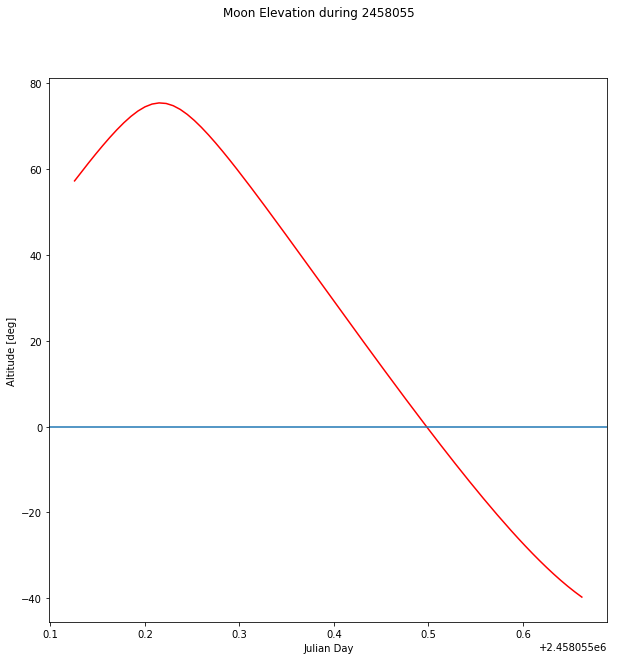

In [93]:
#But it gives us a plot of the sun altitude! Note the 18 degree allowance for astronomical twilight.
plt.figure(figsize=[10,10])
plt.plot(timefloat,moonaltaz.alt, color='r')
#plt.fill_between(timefloat, -45, 45, moonaltaz.alt < -0*u.deg, color='0.5', zorder=0) #sun below horizon
#plt.fill_between(timefloat, -45, 45, moonaltaz.alt < -18*u.deg, color='k', zorder=0) #twilight
plt.axhline()
#plt.ylim(-45, 45)
plt.xlabel('Julian Day')
plt.ylabel('Altitude [deg]')
plt.suptitle('Moon Elevation during 2458055')
plt.show()

In [94]:
goodtimes_ind=[]
for times in range(len(sunangle_arr)):
    if sunangle_arr[times]<280.0 and sunangle_arr[times]>100.0:
        goodtimes_ind.append([times])
        

NameError: name 'sunangle_arr' is not defined

In [ ]:
goodtimes_ind=list(itertools.chain(*goodtimes_ind))
print(goodtimes_ind)


In [ ]:
#take good indices, return observation list
sundown_arr=[]
#print(range(len(goodtimes_ind)))
for i in range(len(goodtimes_ind)):
    sundown_arr.append(JD_arr[goodtimes_ind[i]])
    
print(sundown_arr)

In [ ]:
print(sundown_arr[len(sundown_arr)/4]) 

We now have our list of valid observations, and we can continue our analysis appropriately. This will involve the calibration of .uv files using existing .calfits files, and then the subsequent creation of images using those UV files. With these images, we can check for any RFI sources visually.

In [ ]:
tdate=2458140.31392 #first good time of the night
testdate=Time(tdate,format='jd',scale='utc')
sdate=testdate.sidereal_time('apparent','21d25m39.0s')
print (sdate)

In [ ]:
#compare this to 2458042
tdate2=2458042.58150 #similar time of night
testdate2=Time(tdate2,format='jd',scale='utc')
sdate2=testdate2.sidereal_time('apparent','21d25m39.0s')
print (sdate2)

In [ ]:
print(range(15,20))

In [ ]:
for files in range(15, 20):
    print(files)